# Wavewriter

a page for generating .wav playalong files over harmonic sequences.  Simple sine waves for now.

In [1]:
#general
import numpy as np
import IPython.display as ipd
# local
import pt_keypattern
import jupyter_pt_tools as jpt_pt
import pt_naming_conventions
import pt_musicutils
import pt_utils
import pt_analyzeaudio

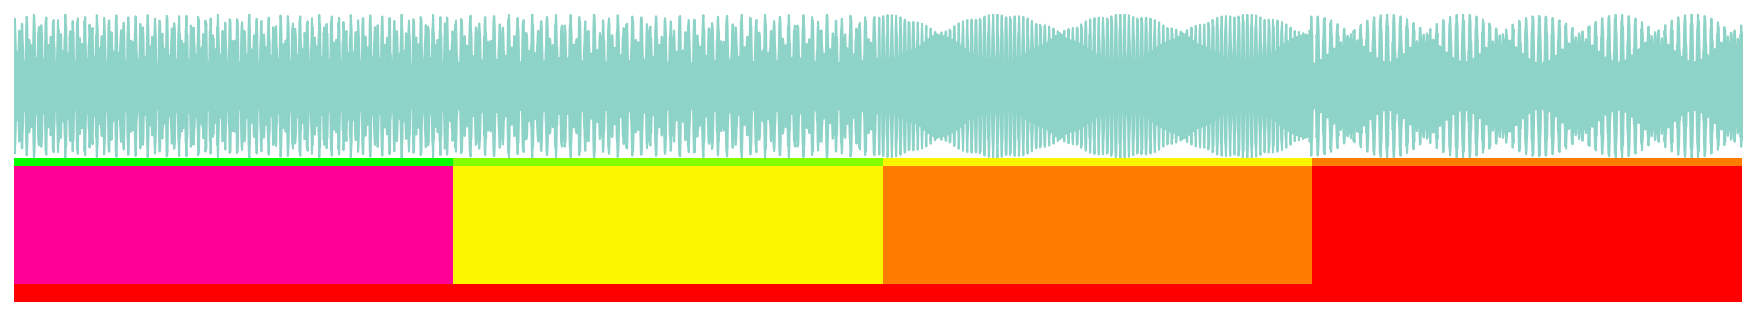

In [2]:
k = 0
p = 0
k_name = pt_naming_conventions.circle_fifth_notes()[(k + 1)%12]

base_seq = [4,3,2,1]
seq_length = len(base_seq)
loops = 1
loopdur = 4
dur = loopdur * loops

seq_name = "6251"
filename = k_name + "_" + seq_name

six_two_five_one = [np.array([k, p, i, 4, 2]) for i in base_seq] * loops

two_five_one = [np.array([k, 0, seq_length-i,4,3]) for i in range(seq_length)] + [np.array([k, 0, 1, 4, 3])]
two_five_one *= loops

blue_in_green_chords = [46819, 46819, 
                        46947, 46947,
                        48418, 40354, 43235, 43171, 
                        45091, 45091, 
                        46947, 46947, 
                        45347, 45347,
                        2341, 2341,
                        45924, 45924,
                        45347, 45347]


blue_in_green_kpdve = [pt_utils.binary_encoding_to_KPDVE(a_num) for a_num in blue_in_green_chords]
blue_in_green_hex = [hex(a_num)for a_num in blue_in_green_chords]

current_chart = np.array(six_two_five_one)
chart_name = seq_name

bin_seq = [pt_keypattern.get_binary_KPDVE_chord(a_kpdve) for a_kpdve in current_chart]

sequence = jpt_pt.link_wavepile_sequences(bin_seq, duration=dur)
filename = k_name + chart_name + "_step.wav"
# should divide by max val...
jpt_pt.norm_wave_write(sequence, filename)
pt_analyzeaudio.graph_audio_file(filename, chroma_threshold=0.5)
ipd.Audio(filename, rate=4000)

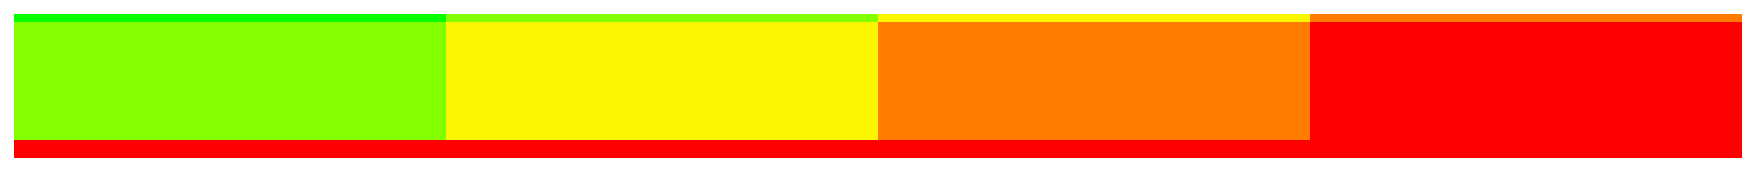

In [3]:
pt_analyzeaudio.graph_kpdve(current_chart)

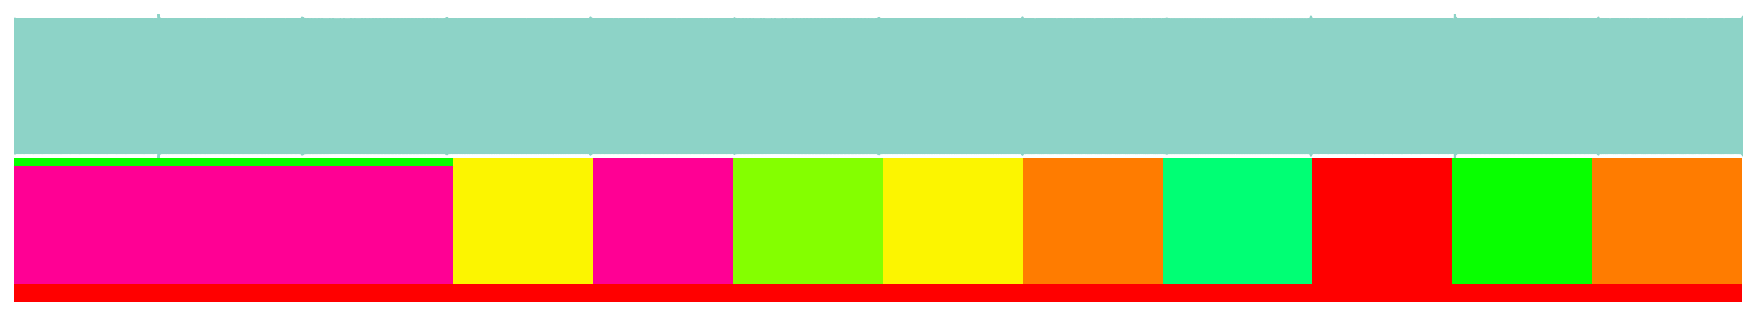

In [4]:
sequence2 =jpt_pt.link_wavestep_sequences(bin_seq, duration=dur)
filename = k_name + chart_name + "_step.wav"

jpt_pt.norm_wave_write(sequence2, filename)
pt_analyzeaudio.graph_audio_file(filename, chroma_threshold=0.5)
ipd.Audio(filename, rate=4000)

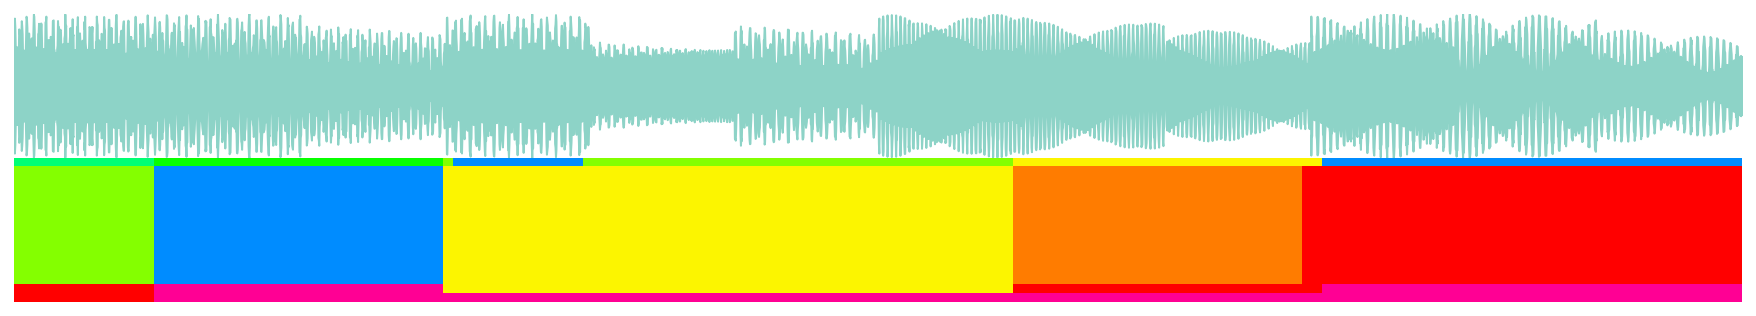

In [5]:
filename = k_name + chart_name + "_combo.wav"

sequence3 = sequence +  sequence2
jpt_pt.norm_wave_write(sequence3, filename)
pt_analyzeaudio.graph_audio_file(filename, chroma_threshold=0.3)
ipd.Audio(filename, rate=4000)

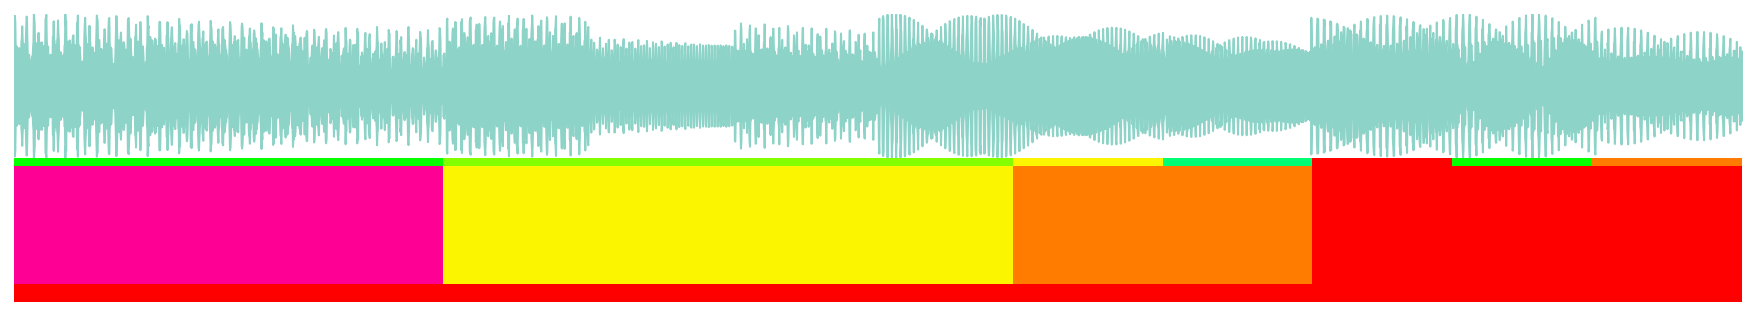

In [6]:
filename = k_name + chart_name + "_combo_bass.wav"

bin_seq = [pt_musicutils.circle_root_note_for_KPDVE(a_kpdve) for a_kpdve in current_chart]

sequence4 = jpt_pt.link_wavepile_sequences(bin_seq, duration=dur, from_middle_c=-1)
sequence4 += sequence3
jpt_pt.norm_wave_write(sequence4, filename)
pt_analyzeaudio.graph_audio_file(filename, chroma_threshold=0.5)
ipd.Audio(filename, rate=4000)

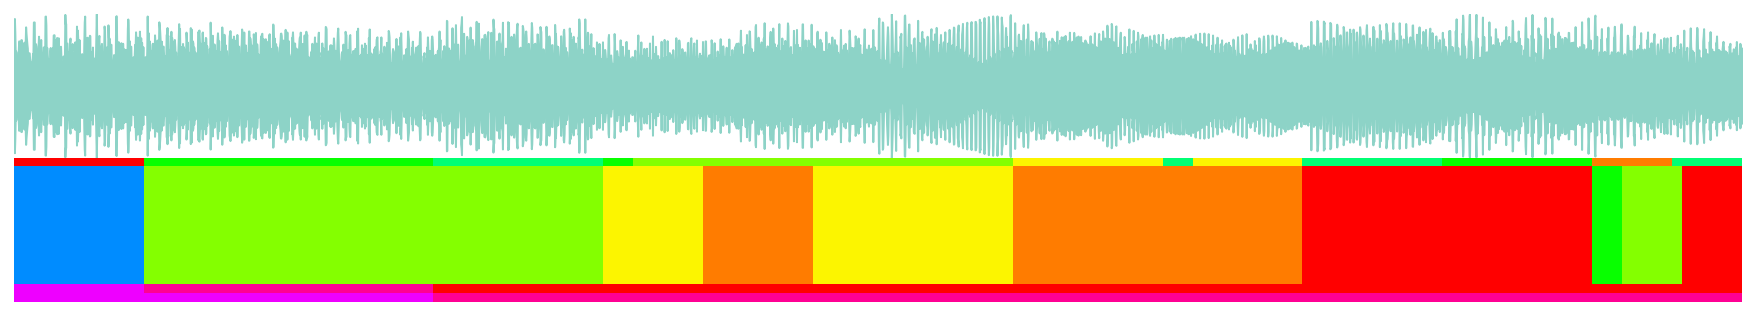

In [7]:
filename = k_name + chart_name + "_combo_bass_scales.wav"
bin_seq = [pt_keypattern.get_binary_KP(a_kpdve[0], a_kpdve[1]) for a_kpdve in current_chart]

sequence5 = jpt_pt.link_wavestep_sequences(bin_seq, duration=dur, from_middle_c=1)
sequence5 += sequence4
jpt_pt.norm_wave_write(sequence5, filename)
pt_analyzeaudio.graph_audio_file(filename, chroma_threshold=0.4)
ipd.Audio(filename, rate=4000)